# TRAITEMENT DES IMAGES

## Caractéristiques d’une image


### Les pixels
Une image est un ensemble de pixels qui peuvent être définis comme des zones carrées identiques de dimensions (L × C). La couleur de chaque pixel est uniforme et l’aspect non granulaire d’une image n’est dû qu’au fait que la taille des pixels est très petite.\
La figure ci-dessous donne un exemple d’image "binaire" représentant un A. \
Il n’y a ici que deux couleurs : noir et blanc.\
![pictures/A.png](pictures/A.png)

Les images dites en « noir et blanc » sont en fait des images en dégradé de gris. \
Elles peuvent aussi être représentées par des matrices : chaque élément de la matrice correspondra comme précédemment à un pixel, mais ces éléments seront des nombres entiers donnant l’intensité de gris voulue. \
On utilise habituellement des nombres de 0 à 255, 0 pour le noir et 255 pour le blanc, soit $256 = 2^8$ niveaux de gris, ce qui permet de coder un pixel par 8 bits.

Les images en couleur sont représentées par trois matrices de taille identique, donnant l’intensité de Rouge, Vert, et Bleu pour chaque pixel. Cette méthode est désignée par le sigle RGB (Red, Green, Blue).\
Les éléments de ces trois matrices sont encore des entiers de 0 à 255. 
Dans le système RGB, il y a donc $256^ 3 = 2^{24} = 16 777 216$ teintes possibles pour chaque pixel.\
L’image finale est obtenue en combinant les trois images. Ci-dessous le résultat final.\
![pictures/reign_pic_breakdown.png](pictures/reign_pic_breakdown.png)



### Le format RGB
Une norme fréquemment utilisée pour les images numériques est la norme RGB (Red Green Blue). Ce qu'on appelle un pixel d'écran est composé de trois leds des trois couleurs RGB. Un pixel informatique est alors représenté sous la forme de trois valeurs numériques comprises entre 0 et 255, 0 représentant la led éteinte, et 255 la led totalement allumée. Ainsi :
- la couleur rouge est représentée par (255,0,0) ;
- la couleur verte est représentée par  (0,255,0);
- la couleur bleue est représentée par (0,0,255) ;
- la couleur fuchsia (violet) est représentée par (255,0,255) ...


![pictures/three_d_array.png](pictures/three_d_array.png)

### Transparence et Canal Alpha

Pour certains types d'images, un quatrième octet est utilisé pour chaque pixel. Il s'agit du canal alpha, qui caractérise la transparence de ce pixel. Cette couche supplémentaire permet de superposer des images - par exemple dans un jeu vidéo un sprite pourra apparaître sur le fond, sans masquer la totalité sous la forme d'un carré.

Cet octet supplémentaire est utilisé de la manière suivante :

- si il est à 255, le pixel est correctemnt affiché ;
- si il est à 0, le pixel est transparent.

En informatique, une image en couleurs est constituée d’un ensemble de pixels colorés, arrangés en lignes et en colonnes. Chaque pixel est, généralement, constitué d’un mélange de trois couleurs : rouge, vert et bleu.\
![pictures/rgb_model.png](pictures/rgb_model.png)



### Chargement de l’image

Nous allons utiliser le module image de matplotlib

 pour charger en mémoire une image.


In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

On peut procéder de la sorte pour charger une image en-nesyri.png qui se trouverait en répertoire local:


In [2]:
img = plt.imread('pictures/en-nesyri.png')

#### La taille de l'image

Si, dans un algorithme, il est besoin de connaître la taille de l’image, on rappelle que image.shape fournit un tuple de trois éléments, conprenant la hauteur de l’image, sa largeur, et le nombre de canaux de couleur (3, en principe).


In [3]:
print(img.shape)

(667, 1000, 3)


#### Affichage d’une image
Pour afficher une image ayant trois canaux de couleur, il suffit de faire appel à plt.imshow:


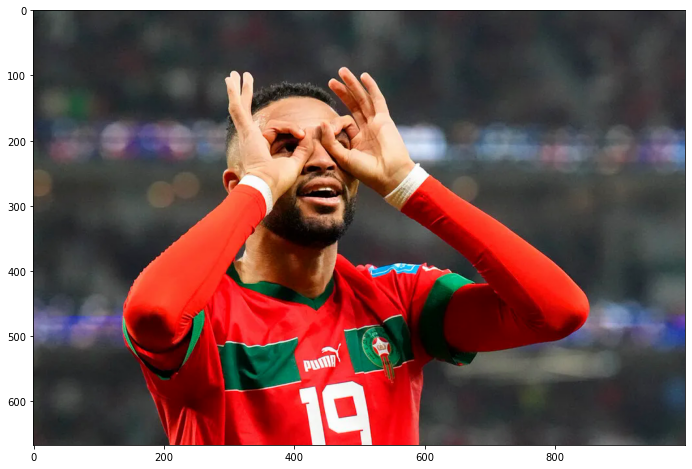

In [4]:
plt.figure(figsize=(12,8))
plt.imshow(img)

Ainsi, vous avez vos données dans un tableau numpy (soit en l'important, soit en le générant).\
Affichons-le, Dans Matplotlib, cela est effectué à l'aide de la fonction imshow().\
Ici, nous allons saisir l'objet plot. Cet objet vous permet de manipuler facilement le tracé à partir de l'invite.

Python utilise un tableau à trois dimensions pour représenter l’image en couleur. Comme
pour une matrice, le premier indice désigne la ligne, la seconde la colonne. Le troisième
indice désigne le canal de couleur (dans l’ordre, rouge, vert et bleu).

#### Recadrer l'image

pour selectionner une partie spécifique en peut utiliser le slicing offert par les objets ndarray de numpy, ainsi ce code permet par exemple de selectionner la partie visage du joeur Youssef En-nesyri.

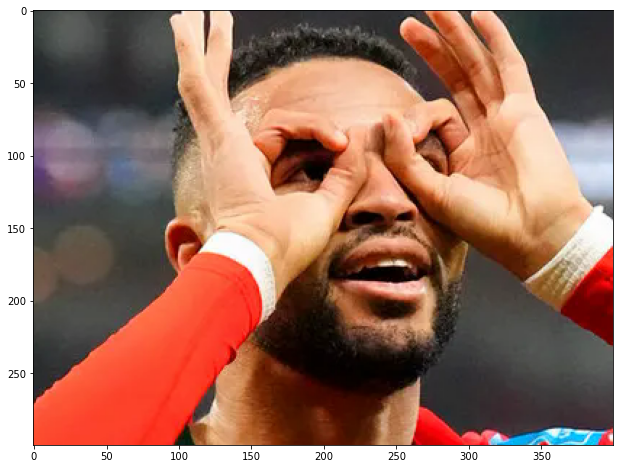

In [5]:
plt.figure(figsize=(12,8))
plt.imshow(img[100:400,200:600])

### Modification d’une image


On peut modifier la valeur correspondant à l’intensité d’une couleur d’un pixel par mutation de la case correspondante du tableau, par exemple de la sorte :

In [6]:
img[4, 11, 2] = 0.2

Cette commande attribue, pour le pixel situé sur la ligne d’index 4 (la cinquième ligne), dans la colonne d’index 11, une intensité égale à 0.2 pour le canal d’index 2 (le troisième canal de couleur, donc, correspondant au bleu).
désigne la couleur bleue du pixel situé à la cinquième ligne et à la douzième colonne (on rappelle que les indices débutent à 0).
Chacune des valeurs est un entier sur 8 bits, entre 0 et 1. 0 représente l’absence de la couleur concernée, 1 le maximum.\ 
Si les trois valeurs de couleur sont à 0, on obtient du noir. Si elles sont toutes les trois à 1, du blanc.\ Pour obtenir du rouge, il faut une valeur 1 pour la valeur rouge, et 0 pour les deux autres.



In [7]:
img[4, 11] = 0.5, 0.9, 0.2

## Traitements basiques de l’image


Une petite fonction qui permet d'afficher deux images old et new

In [8]:
def afficher_changement(old,new):
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    plt.imshow(old)
    plt.subplot(1,2,2)
    plt.imshow(new)

Dans un premier temps, nous allons écrire quelques fonctions qui modifient une image, passée en argument de la fonction.\
Comme les listes, les numpy.array et donc les images sont des objets mutables, que l’on peut directement  modifier dans les fonctions.\
Les fonctions n’ont donc, en principe, pas besoin de retourner de résultat.


### Inversion
L’inversion d’une image consiste à remplacer, pour chaque pixel et pour chaque canal de couleur, une valeur v par $1.0 − v$ (ou $255 − v$ si l’on travaillait avec des valeurs entières).
Cela a pour effet de transformer le blanc en noir (et inversement), le rouge en cyan, le vert  en magenta, etc. 

Écrire une fonction Inverse(img) qui prend en argument une image et l’inverse, et tester son bon fonctionnement.

In [9]:
def inversion(image):
    return 1-image

In [10]:
image_negatif=inversion(img)
negatif2=np.ones_like(img)-img

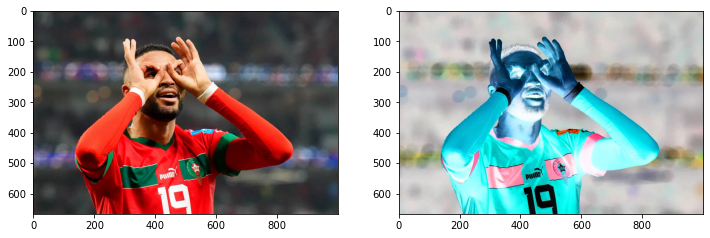

In [11]:
afficher_changement(img,image_negatif)

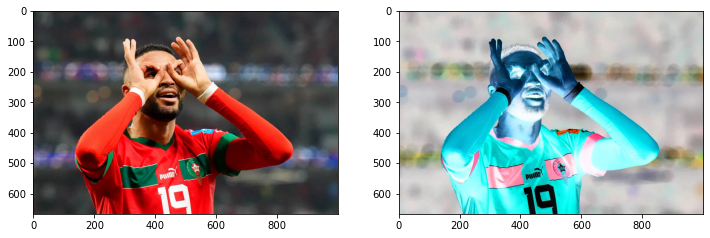

In [12]:
afficher_changement(img,negatif2)

#### Ajouter un réctangle 
- 1.a Écrire une fonction AjouteRectangle(img) qui prend en argument une image, et modifie cette image de façon à ajouter sur celle-ci un rectangle vert de hauteur 80 et de largeur 160 dont le coin en haut à gauche se trouve à la ligne 50 et à la colonne 100.
- 1.b Charger une image, utiliser la fonction précédente, et afficher le résultat à l’écran.

In [13]:
from copy import copy

In [14]:
def border(image):
    newimage=copy(image)
    n=len(image)
    m=int(0.1*n)
    blue=np.array([0,0,1])
    newimage[0:m,:]=blue
    newimage[-m:-1:]=blue
    newimage[:,0:m]=blue
    newimage[:,-m:-1]=blue
    return newimage

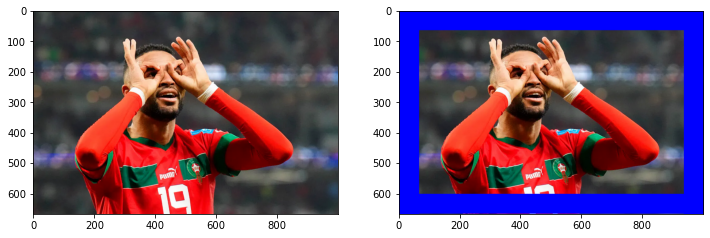

In [15]:
imageborder=border(img)
afficher_changement(img,imageborder)

Écrire une fonction AjouteDisque(img) qui prend en argument une image, et modifie cette image de façon a ajouter sur celle-ci un disque noire de rayon égale à la moitie de minimaum entre le nombre des lignes et le nombre des colones dont le centre se trouve au centre de l'image, puis tester son bon fonctionnement

In [16]:
def norm2(i,j):
    return np.sqrt(i**2+j**2)

In [17]:
def cercle(image,ep=1):
    mx,my=len(image)//2,len(image[0])//2
    radious=min(mx,my)
    epaiseur=ep*radious
    blue=np.array([0,0,200/255])
    new_image=copy(image)
    masque=[[norm2(i-mx,j-my)<radious and norm2(i-mx,j-my)>radious-epaiseur for j in range(len(image[0]))]for i in range(len(image))]
    new_image[masque]=blue
    return new_image

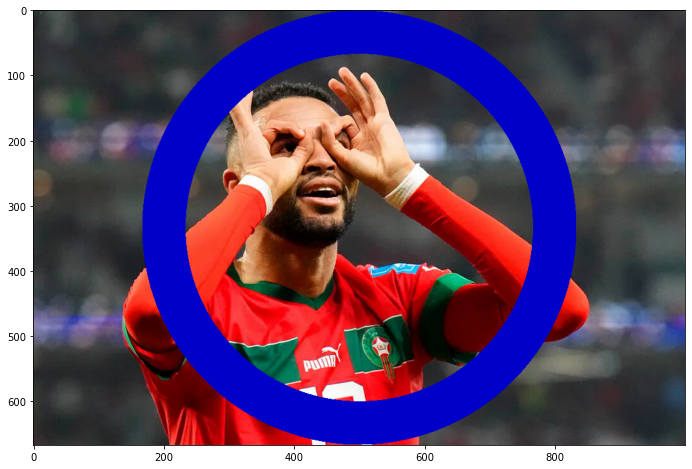

In [18]:
new_image=cercle(img,0.2)
plt.figure(figsize=(12,8))
plt.imshow(new_image)

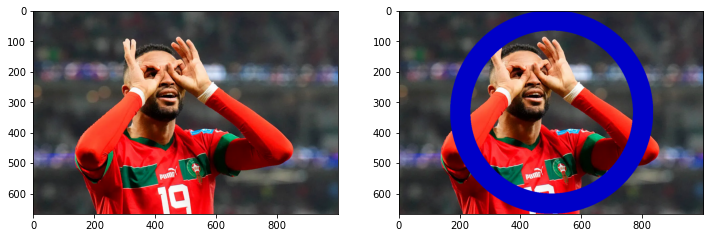

In [19]:
afficher_changement(img,new_image)

### Retournement
Le retournement d’une image consiste à effectuer une symétrie autour de la ligne médiane de l’image.\
Les pixels de la dernière ligne se retrouvent sur la première ligne (et inversement), et ainsi de suite.

In [20]:
def horizental_sym(image):
    newimage=np.array(list((reversed(image))))
    return newimage

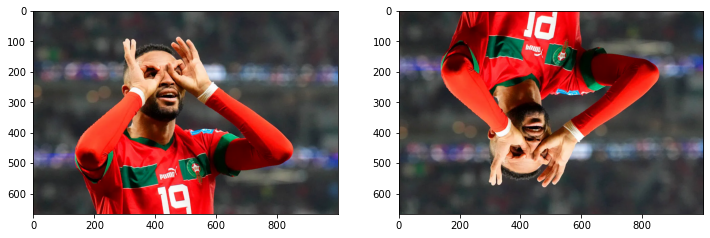

In [21]:
hsym=horizental_sym(img)
afficher_changement(img,hsym)

In [22]:
def retournemet(image):
    n,_,_=image.shape
    for i in range(n//2):
        l1=image[i]
        image[i],image[n-1-i]=copy(image[n-1-i]),copy(image[i])
        #essayer d'enlever copy

In [23]:
img=plt.imread("pictures/en-nesyri.png")

In [24]:
retournemet(img)

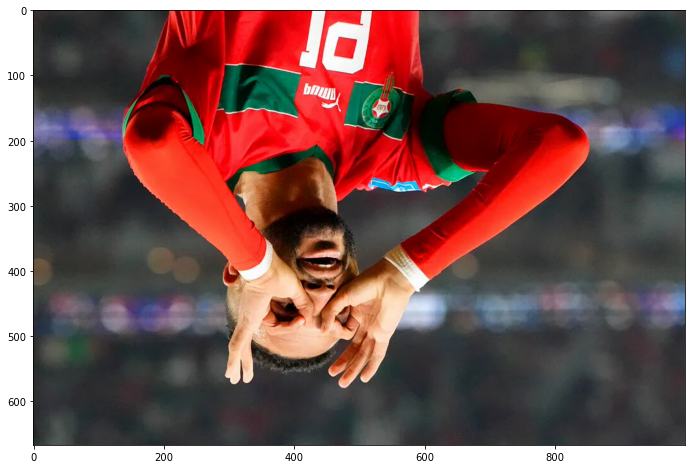

In [25]:
plt.figure(figsize=(12,8))
plt.imshow(img)

#### Miroire
Ecrire une fonction Miroire(img) qui renvoie l’image miroire de img.


In [26]:
img=plt.imread("pictures/en-nesyri.png")

In [27]:
def miroir(image):
    return np.array([[l[i] for i in range(len(l)-1,-1,-1)] for l in image])

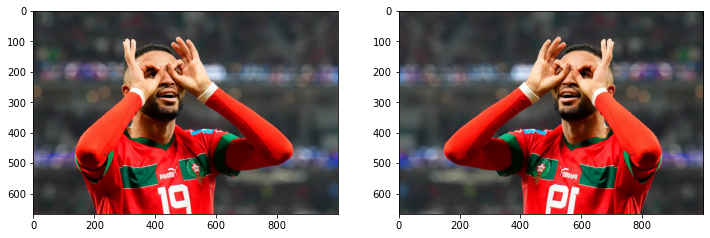

In [28]:
mirror=miroir(img)
afficher_changement(img,mirror)

### Passage en niveaux de gris
Pour obtenir une image en niveaux de gris, c’est-à-dire dépourvue de couleur, il suffit que les valeurs des trois canaux de couleur de chaque pixel soient égales.\
Attention, cela reste une image en couleur, même si tous les pixels sont gris (on n’aura donc pas besoin de l’argument cmap="gray" ici).

Pour convertir une image couleur en niveaux de gris, il faut donc remplacer les valeurs
des trois canaux par une unique valeur représentant la luminosité du pixel.

Il existe plusieurs façons de calculer cette valeur, selon l’image que l’on souhaite obtenir à l’arrivée. Lorsque l’on souhaite se rapprocher le plus possible de la vision humaine, on peut utiliser la formule suivante (qui privilégie le vert car c’est la couleur à laquelle notre œil est le plus sensible) :

$$0.2126 × Rouge + 0.7152 × Vert + 0.0722 × Bleu$$

On remarquera que la somme des trois coefficients est égale à 1.0, ce qui permet de
s’assurer que le résultat ne dépassera pas 1.0, et atteindra la valeur de 1.0 pour un pixel où les trois composantes de couleur égales à 1.0.

Écrire une fonction Monochrome(img) qui prend en argument une image en couleurs
et la transforme en une image en niveaux de gris selon la formule précédente, et vérifier
son bon fonctionnement.



In [29]:
def Monochrome(image):
    newimage=0*image[:,:,0]+0 *image[:,:,1]+1 *image[:,:,2]
    return newimage

In [30]:
def triplet(image):
    return np.array([[[c]*3 for c in l]for l in image])

In [31]:
image_grise=triplet(Monochrome(img))


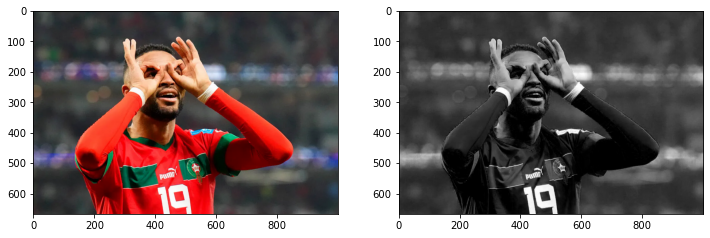

In [32]:
afficher_changement(img,image_grise)

#### Modification du contraste


Certaines images peuvent être surexposées (trop claire, les valeurs des différents canaux de couleur étant toutes grandes), sous-exposée (même chose avec de petites valeurs), ou peu contrastée (toutes les valeurs sont proches).
Corriger le contraste d’une image consiste à modifier la répartition des valeurs entre 0.0 et 1.0 dans chacun des canaux. Cela consiste à appliquer, pour chaque canal de chaque pixel, une fonction définie de la sorte :

- si la valeur v est inférieure à vmin, on la remplace par 0.0 ;
- si la valeur v est supérieure à vmax, on la remplace par 1.0 ;
- sinon, on remplace la valeur v par (v − vmin)/(vmax − vmin).

On supposera, par simplicité, que l’on utilise la même formule pour chacun des trois canaux de couleurs et pour chacun des pixels. Il est fréquent d’utiliser des fonctions différentes pour chaque couleur, ce qui permet de corriger la teinte d’une image (par exemple une image rougie car prise sous un éclairage artificiel). Il arrive parfois que l’on utilise des fonctions différentes selon la zone de l’image, par exemple lorsque l’on veut obtenir un effet « HDR » (haute dynamique). Cela permet de ne pas avoir, sur une même image, des zones sous-exposées et des zones sur-exposées, ce qui est fréquemment le cas pour les images prises à l’extérieur.


Écrire une fonction AugmenteContraste(img, vmin, vmax) qui modifie le contraste d’une image, et vérifier son bon fonctionnement.\
  On pourra choisir par exemple comme paramètres vmin = 0.2 et vmax = 0.8.


In [33]:
def augmentContrast(image,vmin = 0.2,vmax = 0.8):
    return np.array([[[0 if v<vmin else 1 if v>vmax else (v-vmin)/(vmax-vmin)  for v in c] for c in l] for l in img])

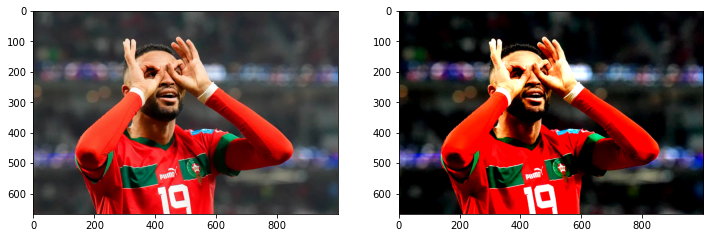

In [34]:
image_contrast=augmentContrast(img)
afficher_changement(img,image_contrast)

In [35]:
def red(image):
    newimage=copy(image)
    newimage[:,:,1:]=0
    return newimage

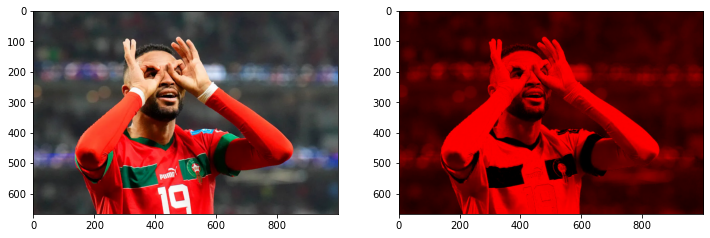

In [36]:
redimage=red(img)
afficher_changement(img,redimage)

### Histogramme d’une image
L’histogramme d’une image est le graphique qui représente le nombre de pixels existant pour chaque valeur. Calculer l’histogramme de l’image en niveaux de gris, c’est en d’autres termes compter combien il y a de pixels pour chaque nuance de gris.

In [37]:
def histogram(image_grise):
    histo=dict()
    for l in image_grise:
        for c in l:
            if c not in histo:
                histo[c]=1
            else:
                 histo[c]+=1
    return histo.items()

In [38]:
image2=plt.imread("pictures/Lenna.png")
image_grise2=Monochrome(image2)
histo2=sorted(histogram(image_grise2))
pixels,occurences=np.array(histo2).transpose()

In [39]:
transp=image_grise.transpose()

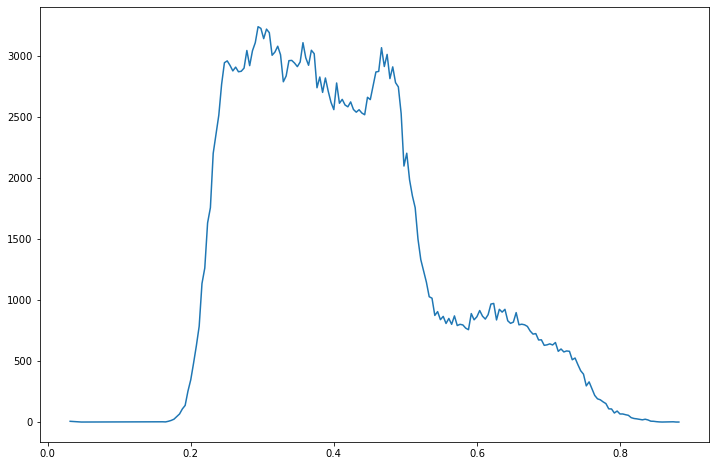

In [40]:
plt.figure(figsize=(12,8))
plt.plot(pixels,occurences)

In [41]:
gris=Monochrome(img)
histo1=histogram(gris)
histo1=sorted(histo1)

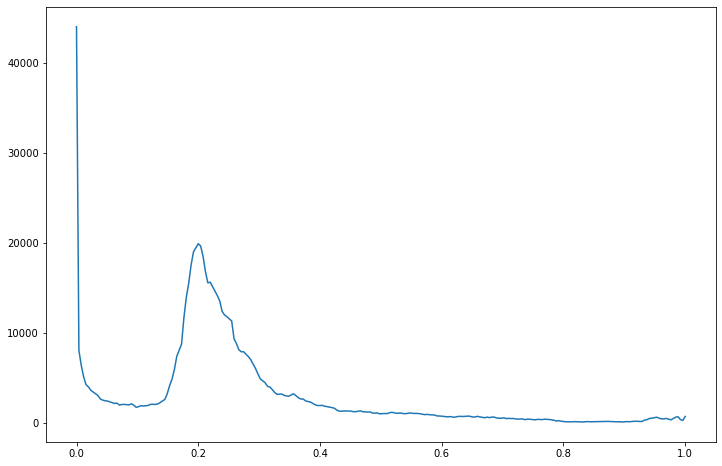

In [42]:
i,v=np.array(histo1).transpose()
plt.figure(figsize=(12,8))
plt.plot(i,v)

### Seuillage fixe
Le seuillage est un traitement qui permet de selectionner les informations significatives dans une image, ce traitement nécissite le réglage d'un seuil **S**, 
- Si la valeur d'un pixel Im[i,j] est inférieur au seuil S, alors la valeur de ce pixel est rémplacé  par 0
- Sinon la valeur de ce pixel est remplacé par 1 
Ainsi , on obtient une image en noir et blanc sans niveau de gris

In [43]:
def seuillage(image,S=0.5):
    new_image=copy(image[:,:,0])
    for i in range(len(new_image)):
        for j in range(len(new_image[i])):
            new_image[i,j]=0 if new_image[i,j]<S else 1
    return new_image

In [44]:
seuillé=triplet(seuillage(image_grise))


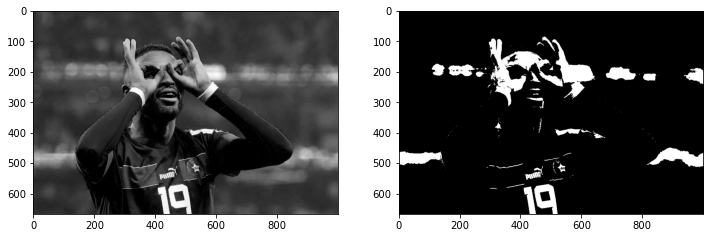

In [45]:
afficher_changement(image_grise,seuillé)

### Rotation d'images

In [46]:
def rotate(image,angle=90,centre=None,):
    l,c,_=img.shape
    if centre==None:
        centre=np.array([l//2,c//2],)
    new_coordinates=np.ones((l,c,2),dtype="int")
    angle_rad=np.deg2rad(angle)
    rotation_matrix=np.array([[np.cos(angle_rad),-np.sin(angle_rad)],[np.sin(angle_rad),np.cos(angle_rad)]])
    for i in range(l):
        for j in range(c):
            new_coordinates[i,j]=centre+rotation_matrix@(np.array([i,j])-centre)
    m=max(l,c)
    new_image=np.ones((m,m,3))
    for i in range(l):
        for j in range(c):
            ii,jj=new_coordinates[i,j]
            new_image[ii,jj]=img[i,j]
    return new_image


In [47]:
rotate_image=rotate(img,-90)

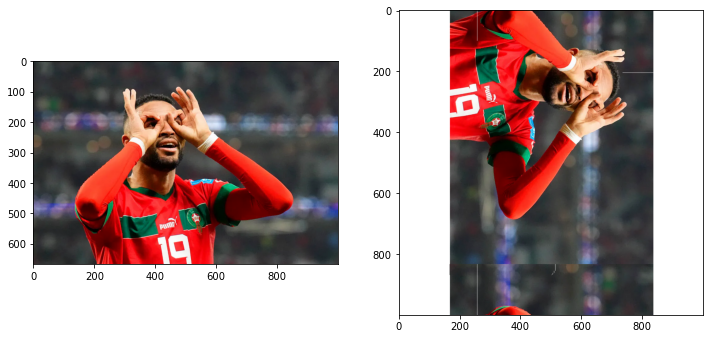

In [48]:
afficher_changement(img,rotate_image)

## Application de filtres

![pictures/convolution.gif](pictures/convolution.gif)

Un filtre, de manière générale, est une boîte noire qui transforme un signal d'entrée en un signal de sortie. \
Ce signal d'entrée peut être un signal ID (tension dépendant du temps), 2D (une image: la valeur du pixel dépend de sa position selon x et y) ou autre. Le signal peut être continu (ses valeurs sont repérées par un paramètre qui varie continûment, comme le temps, c'est le cas de la tension u(t) par exemple) ou discret (ses valeurs peuvent être dénombrées, c'est le cas d'un signal numérique).

Nous avons vu beaucoup de traitements qui s’appliquaient séparément sur chaques
pixels.\
Mais pour obtenir une gamme plus large d’effets, on peut envisager que les nouvelles couleurs d’un pixel dépendent non seulement des anciennes couleurs de ce pixel, mais
également des pixels voisins.

Dans cette situation, il n’est pas possible de modifier directement l’image (pourquoi ?)\
Il faut donc créer une nouvelle image vide, dont on pourra ensuite fixer la couleur de chaque pixel sans toucher à l’image originale.

Les fonctions suivantes vont donc retourner une nouvelle image qui sera le résultat du
calcul souhaité, au contraire des fonctions précédentes qui modifiaient leur argument.

### Flou ou Filtre moyenneur

Le filtre moyenneur est une opération de traitement d’images utilisée pour réduire le bruit dans une image et/ou flouter une image. 

Le filtre moyenneur fait parti de la catégorie des filtres d’images locaux car pour calculer la nouvelle valeur d’un pixel, il regarde la valeur des pixels proches\
Concrètement, la valeur filtrée d’un pixel p est égale à la moyenne des valeurs des pixels proches de p.\
En général, on définit les « pixels proches de p » comme l’ensemble de pixels contenus dans un carré de largeur k centré sur p :

Pour appliquer un flou à l’image, on remplace chaque couleur de chaque pixel par une
moyenne des couleurs des neufs pixels entourant le pixel considéré.
1. Écrire une fonction Floute(img) qui prend en entrée une image img et retourne
une nouvelle image correspondant à un flou de l’image originale, et vérifier son bon
fonctionnement. On réfléchira à ce qu’il est possible de faire sur les bords de l’image.

In [49]:
vegeta_image=plt.imread("pictures/vegeta.png")

In [50]:
def flou(image):
    flou=(image[2:,2:]+image[2:,1:-1]+image[2:,:-2]+\
    image[1:-1,2:]+image[1:-1,:-2]+\
    image[:-2,2:]+image[:-2,1:-1]+image[:-2,:-2])/9
    return flou

In [51]:
flou_image=flou(vegeta_image)

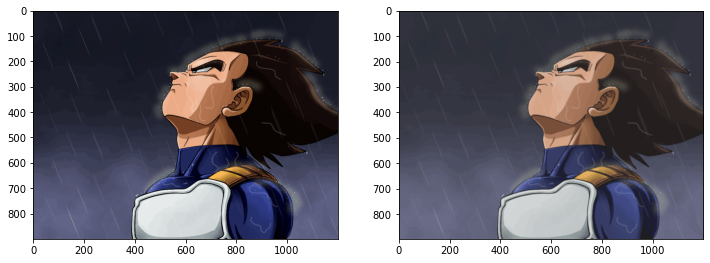

In [52]:
afficher_changement(vegeta_image,flou_image)

In [53]:
def flou_loops(image):
    newimage=np.zeros_like(image)
    l,c,_=image.shape
    for i in range(1,l-1):
        for j in range(1,c-1):
            newimage[i,j]=(image[i-1,j-1]+image[i-1,j]+image[i-1,j+1]+image[i,j-1]+image[i,j+1]+image[i+1,j-1]+image[i+1,j]+image[i+1,j+1])/9
    return newimage

In [54]:
image2_flou=flou_loops(vegeta_image)

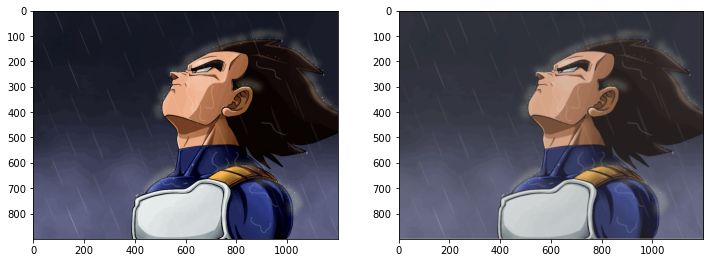

In [55]:
afficher_changement(vegeta_image,image2_flou)

### Détection de contours

Un contour, dans une image, est une zone de fortes variations des valeurs: si on pense à la
photographie d'un poster sombre sur un mur blanc, le contour sera l'endroit où l'on passe
du sombre au blanc. Détecter des contours est une opération importante, c'est la première étape vers des opérations de comptage automatisé, de reconnaissance de visages, etc. C'est une opération relativement compliquée dont nous allons voir ci-après quelques bases.

Il est possible de détecter les contours d’une image en déterminant, pour chaque pixel, la norme du gradient en ce point. En effet, un gradient élevé correspond à une brusque variation de la luminosité ou de la couleur, ce que l’on trouve en général au bord des objets.

In [56]:
def convolution(image,noyeau):
    nl,nc=noyeau.shape
    l,c=image.shape
    image_augmentée=np.zeros((l+2,c+2))
    image_augmentée[1:-1,1:-1]=image
    newimage=np.zeros_like(image)
    for i in range(l):
        for j in range(c):
            newimage[i,j]=abs(sum(sum(noyeau*image_augmentée[i:i+3,j:j+3])))
    return newimage

#### Concolution et filtre Moyenneur

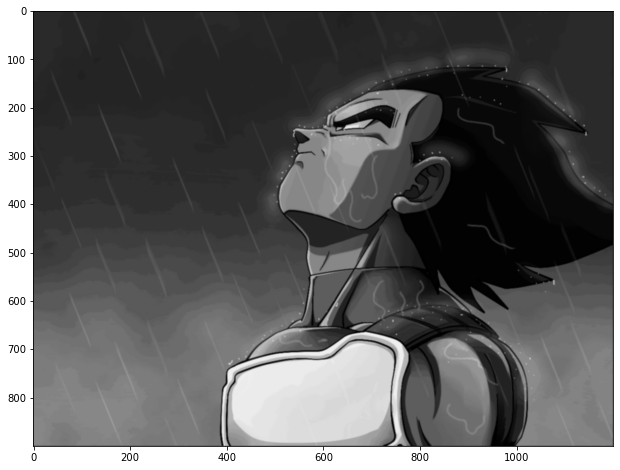

In [57]:
moyenne=np.array([[1,1,1],[1,1,1],[1,1,1]])/9
gris=Monochrome(vegeta_image)
fl=convolution(gris,moyenne)
fl=triplet(fl)
plt.figure(figsize=(12,8))
plt.imshow(fl)

### Détection des contours

In [58]:
gris=triplet(Monochrome(vegeta_image))
gris=gris[:,:,0]

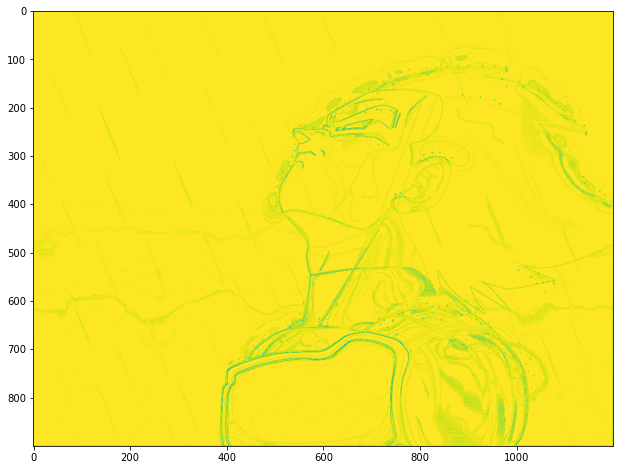

In [59]:
diff=np.array([[0,1,0],[1,-4,1],[0,1,0]])
fl=convolution(gris,diff)
plt.figure(figsize=(12,8))
plt.imshow(1-fl)

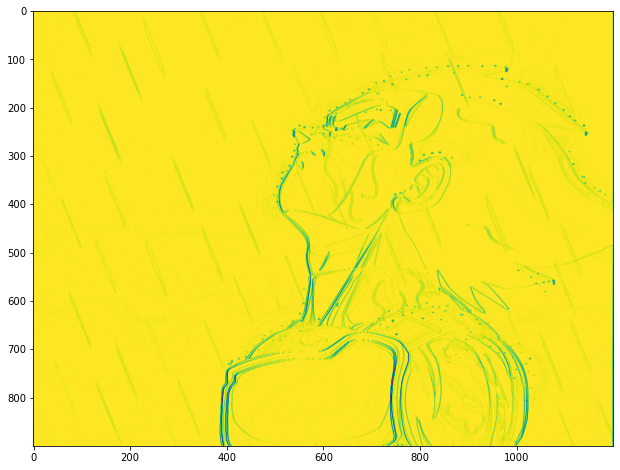

In [60]:
sobel=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sbl=convolution(gris,sobel)
plt.figure(figsize=(12,8))
plt.imshow(1-sbl)

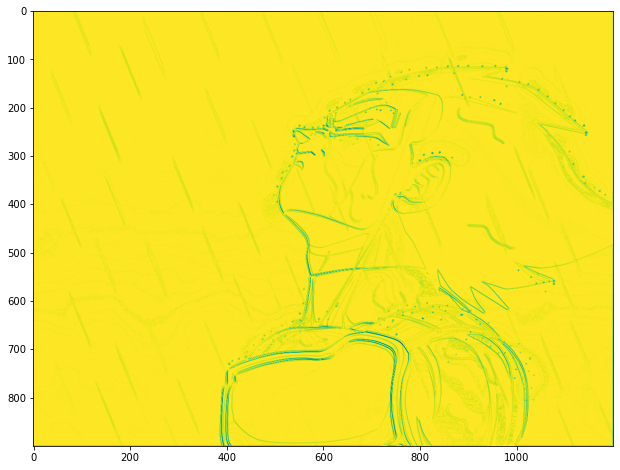

In [61]:
sobel2=np.array([[0,1,0],[-1,0,1],[0,-1,0]])
sbl2=convolution(gris,sobel2)
plt.figure(figsize=(12,8))
plt.imshow(1-sbl2)